# DIABETES PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING DATASET

In [2]:
df=pd.read_csv('Diabetes.csv')
columns_name = df.columns[0:8].values

## ANALYZING DATASET

In [3]:
df.head()

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   blood pressure            768 non-null    int64  
 3   skin thickness            768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Number of patients without diabetes: 500
Number of patients with diabetes: 268


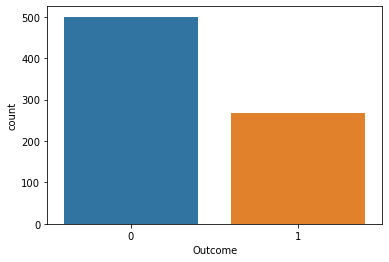

In [28]:
sns.countplot(data=df, x = 'Outcome', label='Count')
withoutDiabetes, withDiabetes = df['Outcome'].value_counts()
print('Number of patients without diabetes: {}'.format(withoutDiabetes))
print('Number of patients with diabetes: {}'.format(withDiabetes))

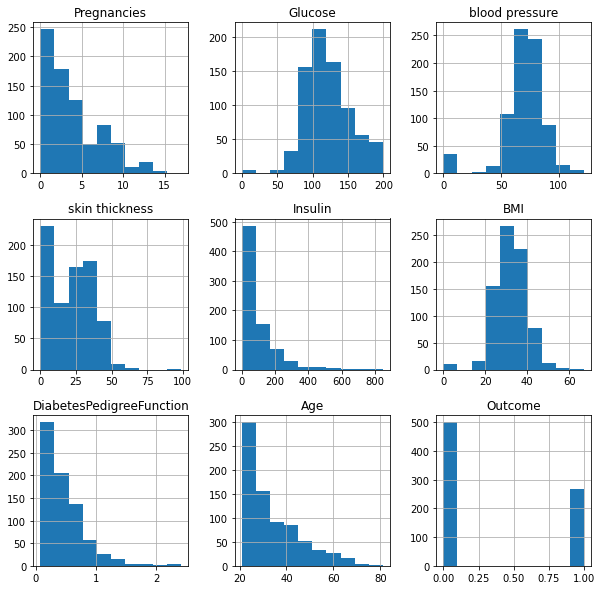

In [29]:
df.hist(figsize = (10,10))
plt.show()

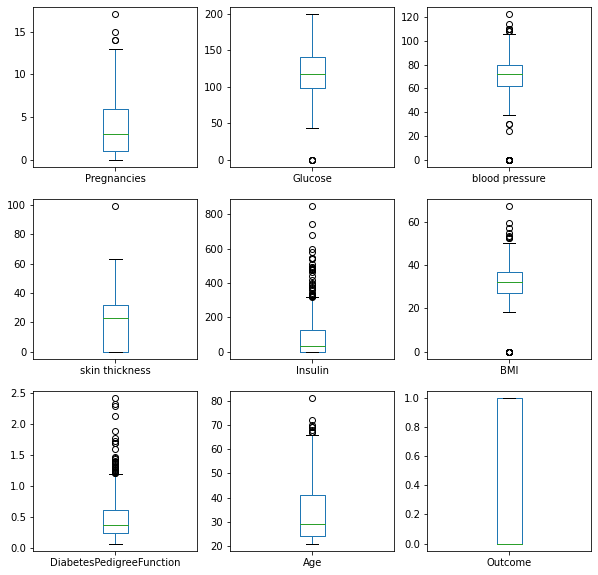

In [32]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()

<AxesSubplot:>

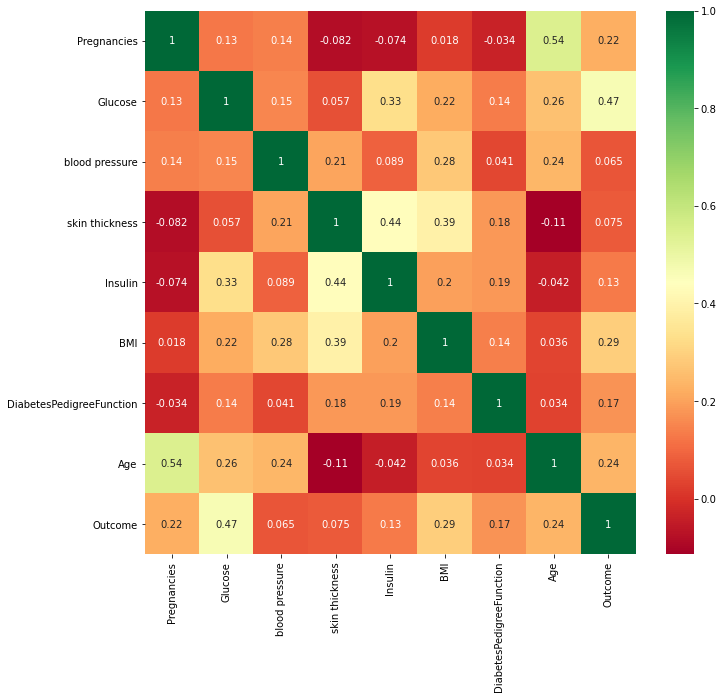

In [6]:
plt.figure(figsize = (11,10))

sns.heatmap(df.corr(), annot =True, cmap = 'RdYlGn')

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1]

## CHECKING FOR MISSING(ZERO) VALUES

In [8]:
print("number of rows missing glucose: ", len(df.loc[df['Glucose'] == 0]))
print("number of rows missing Pregnancies: ", len(df.loc[df['Pregnancies'] == 0]))
print("number of rows missing blood pressure : ", len(df.loc[df['blood pressure'] == 0]))
print("number of rows missing skin thickness : ", len(df.loc[df['skin thickness'] == 0]))
print("number of rows missing Insulin : ", len(df.loc[df['Insulin'] == 0]))
print("number of rows missing BMI : ", len(df.loc[df['BMI'] == 0]))
print("number of rows missing DiabetesPedigreeFunction : ", len(df.loc[df['DiabetesPedigreeFunction'] == 0]))

number of rows missing glucose:  5
number of rows missing Pregnancies:  111
number of rows missing blood pressure :  35
number of rows missing skin thickness :  227
number of rows missing Insulin :  374
number of rows missing BMI :  11
number of rows missing DiabetesPedigreeFunction :  0


## SPLITTING DATASET

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.20, random_state = 121)
pd.DataFrame(X_train, columns = columns_name)

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,108.0,44.0,20.0,130.0,24.0,0.813,35.0
1,1.0,97.0,64.0,19.0,82.0,18.2,0.299,21.0
2,6.0,111.0,64.0,39.0,0.0,34.2,0.260,24.0
3,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0
4,5.0,162.0,104.0,0.0,0.0,37.7,0.151,52.0
...,...,...,...,...,...,...,...,...
609,2.0,117.0,90.0,19.0,71.0,25.2,0.313,21.0
610,1.0,92.0,62.0,25.0,41.0,19.5,0.482,25.0
611,4.0,123.0,62.0,0.0,0.0,32.0,0.226,35.0
612,6.0,154.0,78.0,41.0,140.0,46.1,0.571,27.0


In [10]:
print('shape of X_train = ',X_train.shape)
print('shape of X_test = ',X_test.shape)
print('shape of Y_train = ',Y_train.shape)
print('shape of Y_test = ',Y_test.shape)

shape of X_train =  (614, 8)
shape of X_test =  (154, 8)
shape of Y_train =  (614,)
shape of Y_test =  (154,)


## CONVERTING MISSING VALUES TO MEAN OF THE DATA

In [11]:
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
s_imputer = s_imputer.fit(X_train[:,1:8])
X_train[:,1:8] = s_imputer.transform(X_train[:,1:8])
alpha = pd.DataFrame(X_train,columns = columns_name)
alpha

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,108.0,44.0,20.000000,130.000000,24.0,0.813,35.0
1,1.0,97.0,64.0,19.000000,82.000000,18.2,0.299,21.0
2,6.0,111.0,64.0,39.000000,161.409524,34.2,0.260,24.0
3,1.0,101.0,50.0,15.000000,36.000000,24.2,0.526,26.0
4,5.0,162.0,104.0,29.467593,161.409524,37.7,0.151,52.0
...,...,...,...,...,...,...,...,...
609,2.0,117.0,90.0,19.000000,71.000000,25.2,0.313,21.0
610,1.0,92.0,62.0,25.000000,41.000000,19.5,0.482,25.0
611,4.0,123.0,62.0,29.467593,161.409524,32.0,0.226,35.0
612,6.0,154.0,78.0,41.000000,140.000000,46.1,0.571,27.0


In [12]:
print("number of rows missing glucose: ", len(alpha.loc[alpha['Glucose'] == 0]))
print("number of rows missing Pregnancies: ", len(alpha.loc[alpha['Pregnancies'] == 0]))
print("number of rows missing blood pressure : ", len(alpha.loc[alpha['blood pressure'] == 0]))
print("number of rows missing skin thickness : ",len(alpha.loc[alpha['skin thickness'] == 0]))
print("number of rows missing Insulin : ", len(alpha.loc[alpha['Insulin'] == 0]))
print("number of rows missing BMI : ", len(alpha.loc[alpha['BMI'] == 0]))
print("number of rows missing DiabetesPedigreeFunction : ", len(alpha.loc[alpha['DiabetesPedigreeFunction'] == 0]))

number of rows missing glucose:  0
number of rows missing Pregnancies:  90
number of rows missing blood pressure :  0
number of rows missing skin thickness :  0
number of rows missing Insulin :  0
number of rows missing BMI :  0
number of rows missing DiabetesPedigreeFunction :  0


In [13]:
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
s_imputer = s_imputer.fit(X_test[:,1:8])
X_test[:,1:8] = s_imputer.transform(X_test[:,1:8])
beta = pd.DataFrame(X_test,columns = columns_name)
beta

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,96.0,71.965278,27.908257,132.177215,23.700000,0.190,28.0
1,1.0,100.0,66.000000,15.000000,56.000000,23.600000,0.666,26.0
2,1.0,126.0,60.000000,27.908257,132.177215,30.100000,0.349,47.0
3,7.0,107.0,74.000000,27.908257,132.177215,29.600000,0.254,31.0
4,1.0,133.0,102.000000,28.000000,140.000000,32.800000,0.234,45.0
...,...,...,...,...,...,...,...,...
149,4.0,132.0,86.000000,31.000000,132.177215,28.000000,0.419,63.0
150,7.0,161.0,86.000000,27.908257,132.177215,30.400000,0.165,47.0
151,1.0,84.0,64.000000,23.000000,115.000000,36.900000,0.471,28.0
152,1.0,140.0,74.000000,26.000000,180.000000,24.100000,0.828,23.0


In [14]:
print("number of rows missing glucose: ", len(beta.loc[beta['Glucose'] == 0]))
print("number of rows missing Pregnancies: ",len(beta.loc[beta['Pregnancies'] == 0]))
print("number of rows missing blood pressure : ", len(beta.loc[beta['blood pressure'] == 0]))
print("number of rows missing skin thickness : ", len(beta.loc[beta['skin thickness'] == 0]))
print("number of rows missing Insulin : ", len(beta.loc[beta['Insulin'] == 0]))
print("number of rows missing BMI : ", len(beta.loc[beta['BMI'] == 0]))
print("number of rows missing DiabetesPedigreeFunction : ", len(beta.loc[beta['DiabetesPedigreeFunction'] == 0]))

number of rows missing glucose:  0
number of rows missing Pregnancies:  21
number of rows missing blood pressure :  0
number of rows missing skin thickness :  0
number of rows missing Insulin :  0
number of rows missing BMI :  0
number of rows missing DiabetesPedigreeFunction :  0


## APPLYING CLASSIFIERS AND EVALUATION

## K NEIGHBOR CLASSIFIER

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test,Y_pred_knn)*100

78.57142857142857

## DECISION TREE CLASSIFIER

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4,random_state=14)
dt.fit(X_train,Y_train)
Y_pred_tree = dt.predict(X_test)
accuracy_score(Y_test,Y_pred_tree)*100

79.22077922077922

## LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
accuracy_score(Y_test,Y_pred_lr)*100

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.46753246753246

## RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25,random_state=54)
rf.fit(X_train,Y_train)
Y_pred_random = rf.predict(X_test)
accuracy_score(Y_test,Y_pred_random)*100

83.11688311688312

In [19]:
print(f"Acccracy of KNN Classifier Algorithm = {accuracy_score(Y_test,Y_pred_knn)*100}")
print(f"Acccracy of Decision Tree Classifier Algorithm = {accuracy_score(Y_test,Y_pred_tree)*100}")
print(f"Acccracy of Logistic Regression Classifier Algorithm = {accuracy_score(Y_test,Y_pred_lr)*100}")
print(f"Acccracy of Random Forest Classifier Algorithm = {accuracy_score(Y_test,Y_pred_random)*100}")

Acccracy of KNN Classifier Algorithm = 78.57142857142857
Acccracy of Decision Tree Classifier Algorithm = 79.22077922077922
Acccracy of Logistic Regression Classifier Algorithm = 82.46753246753246
Acccracy of Random Forest Classifier Algorithm = 83.11688311688312


In [20]:
#To check for some given value just input your values in "Diabetes_test.csv" file and run following cells.

test_df = pd.read_csv("Diabetes_test.csv")

In [21]:
test_df

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,132.17725,33.6,0.627,50
1,1,89,66,23,94.00000,28.1,0.167,21
2,0,137,40,35,168.00000,43.1,2.288,33


In [22]:
Y_pred_random_test = rf.predict(test_df)

In [23]:
result = pd.DataFrame(Y_pred_random_test, columns = ["outcome"])
result

,outcome
0,1
1,0
2,1
